# 🚗 Electric Vehicle (EV) Population Data Analysis – Washington State
### 📊 Exploratory Data Analysis (EDA) Project

**Objective:**  
To explore the Electric Vehicle (EV) Population dataset from Washington State, analyze adoption trends, manufacturer dominance, price distribution, and understand how electric range correlates with vehicle price.

**Dataset Source:**  
[Washington State EV Population Data (Data.gov)](https://catalog.data.gov/dataset/electric-vehicle-population-data)

**Tools Used:**  
- Python (Pandas, NumPy, Matplotlib, Seaborn)
- Jupyter Notebook


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load dataset
eva = pd.read_csv("Electric_Vehicle_Population_Data.csv")

# Preview
eva.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


## 📋 Step 1: Data Overview
Let’s check the structure, shape, and basic details of the dataset.


In [8]:
eva.shape
eva.info()
eva.describe()
eva.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         191407 non-null  object 
 1   County                                             191403 non-null  object 
 2   City                                               191403 non-null  object 
 3   State                                              191407 non-null  object 
 4   Postal Code                                        191403 non-null  float64
 5   Model Year                                         191407 non-null  int64  
 6   Make                                               191407 non-null  object 
 7   Model                                              191407 non-null  object 
 8   Electric Vehicle Type                              191407 non-null  object

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 414
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

## 🧹 Step 2: Data Cleaning
We’ll handle missing values, check duplicates, and remove outliers.


In [9]:
# Check missing values
eva.isnull().sum()

# Drop rows with missing critical info (if any)
eva = eva.dropna(subset=['City', 'County', 'Postal Code'])

# Check for duplicates
eva.drop_duplicates(inplace=True)

# Outlier detection using IQR for 'Base MSRP'
Q1 = np.percentile(eva['Base MSRP'], 25)
Q3 = np.percentile(eva['Base MSRP'], 75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

filtered_data = eva[(eva['Base MSRP'] >= lower) & (eva['Base MSRP'] <= upper)]


In [10]:
#Replacing the Null values with so text

eva = eva.fillna({
    'Postal Code': 0,
    'Vehicle Location': 'Unknown',
    'Electric Utility': 'Unknown',
    '2020 Census Tract': 'Unknown'
})


## 📈 Step 3: Exploratory Data Analysis
Visualizing data to uncover patterns, trends, and insights.


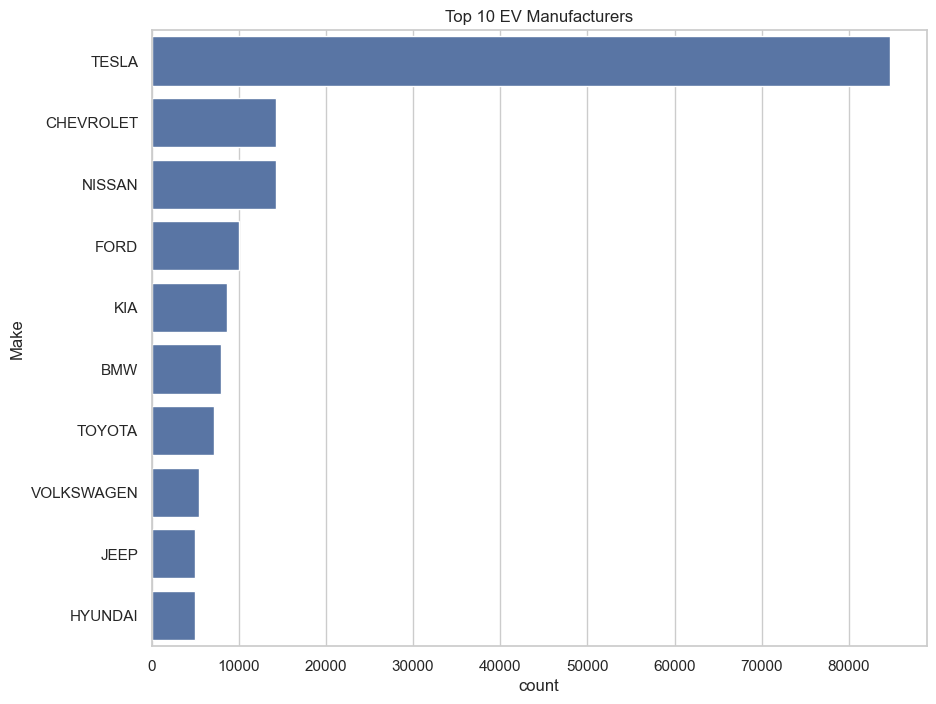

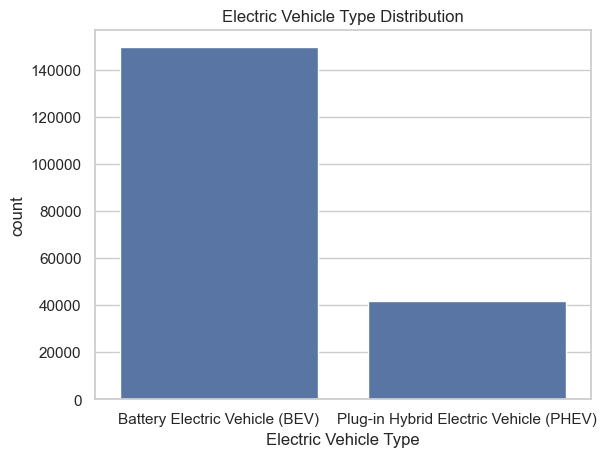

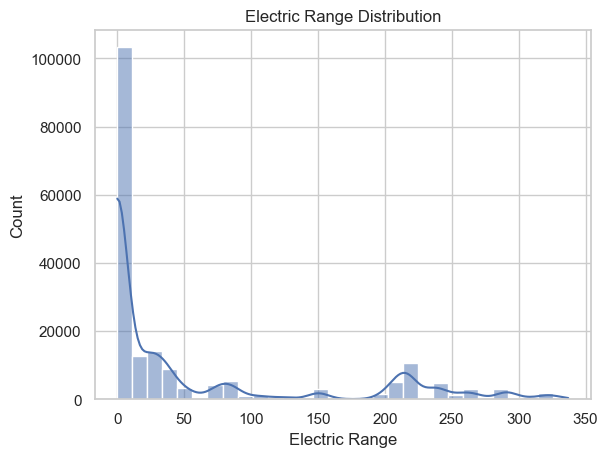

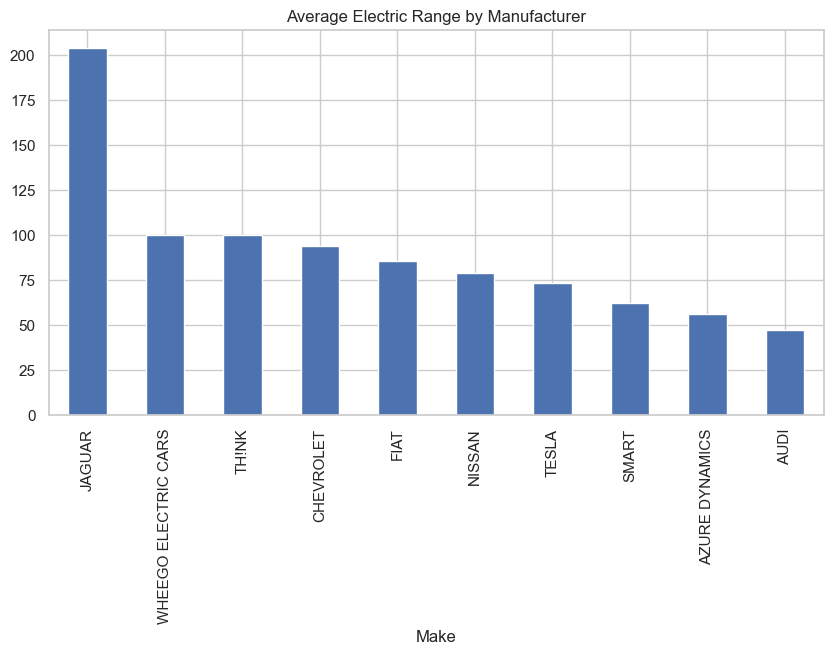

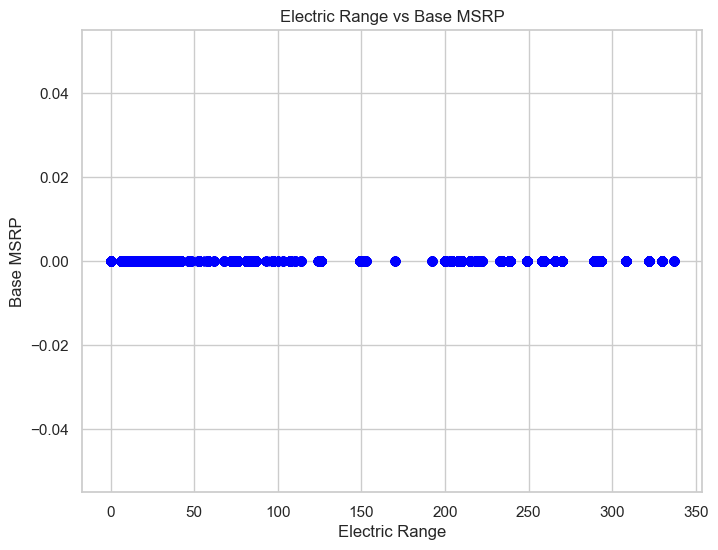

In [11]:
# EVs by manufacturer
plt.figure(figsize=(10,8))
sns.countplot(y='Make', data=eva, order=eva['Make'].value_counts().index[:10])
plt.title('Top 10 EV Manufacturers')
plt.show()

# EV type distribution
sns.countplot(x='Electric Vehicle Type', data=eva)
plt.title('Electric Vehicle Type Distribution')
plt.show()

# Electric range distribution
sns.histplot(eva['Electric Range'], bins=30, kde=True)
plt.title('Electric Range Distribution')
plt.show()

# Average EV range by manufacturer
avg_range = eva.groupby('Make')['Electric Range'].mean().sort_values(ascending=False)
avg_range.head(10).plot(kind='bar', figsize=(10,5), title="Average Electric Range by Manufacturer")
plt.show()

# Relation between range & price (after removing outliers)
plt.figure(figsize=(8,6))
plt.scatter(filtered_data['Electric Range'], filtered_data['Base MSRP'], alpha=0.5, color='blue')
plt.title('Electric Range vs Base MSRP')
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.show()


## 💡 Step 4: Key Insights & Observations

1. **Tesla** dominates the EV market in Washington with the highest registrations.  
2. **Battery Electric Vehicles (BEVs)** are more common than Plug-in Hybrids.  
3. **Electric Range** varies greatly across manufacturers.  
4. **Price (Base MSRP)** has some outliers, but generally ranges between \$30,000–\$80,000.  
5. There is a **weak positive correlation** between Electric Range and Price — higher range usually means higher cost.


## ✅ Step 5: Conclusion

This EDA helped understand the EV landscape in Washington State — showing strong EV adoption trends, dominant manufacturers, and pricing patterns.

**Possible Extensions:**
- Add regression model to predict `Base MSRP` from range and model year.  
- Combine with Indian EV dataset to compare adoption patterns globally.  
- Build dashboard in Power BI or Streamlit for better presentation.
